<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb de *Veneza* referente à Março/2023

## Uma breve descrição sobre a cidade italiana de Veneza

Veneza está localizada ao norte da Itália e é a capital da região de Vêneto. Ela foi construída sobre um arquipélago com 118 ilhas que se interligam através de pontes e canais. Sua beleza e charme atraí milhões de turistas todos os anos.

_Saiba mais em: https://www.visitvenezia.eu/en#_



## O Airbnb

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



## Obtenção dos Dados


In [19]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
# importar o arquivo listings de Veneza para um DataFrame
filename = "https://raw.githubusercontent.com/ajcRodrigues/data-science/main/datasets/listings_Veniza-Italia_202303.csv"
df = pd.read_csv(filename, index_col="id")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificador do imóvel
* `name` - nome da propriedade anunciada
* `host_id` - identificador do proprietário/anfitrião do imóvel
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - distrito ou macro região que contém vários bairros
* `neighbourhood` - nome do bairro
* `latitude` - latitude da propriedade
* `longitude` - longitude da propriedade
* `room_type` - tipo de quarto oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de avaliações recebiddas pela propriedade
* `last_review` - data do última avaliação
* `reviews_per_month` - quantidade de avaliações por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [21]:
# mostrar as 5 primeiras entradas
df.head(5)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
492901,a short walk from piazza san marco,6304868,Roberta,Isole,Castello,45.43480,12.34661,Entire home/apt,450,7,18,2021-09-14,0.14,6,365,0,NaN
493041,APARTMENT FOR 2 PERSONS DECO,2426720,Lorenzo,Isole,San Marco,45.43388,12.33485,Entire home/apt,132,3,22,2022-10-17,0.17,5,225,2,NaN
145324,Double room with a View of the city,703872,Leonardo E Irene,Isole,Cannaregio,45.44285,12.34019,Private room,68,1,434,2023-01-02,3.06,6,105,14,NaN
6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,260,5,179,2022-12-31,1.10,3,259,16,NaN
6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,330,4,80,2022-10-13,0.57,3,302,15,NaN


In [22]:
# df.tail(5)
# df.value_counts("neighbourhood_group")


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [23]:
# identificar o volume de dados do DataFrame
df.info()
print(f"\nEntradas: {df.shape[0]} \nValores: {df.shape[1]}")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7286 entries, 492901 to 841761973514965343
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            7285 non-null   object 
 1   host_id                         7286 non-null   int64  
 2   host_name                       7286 non-null   object 
 3   neighbourhood_group             7286 non-null   object 
 4   neighbourhood                   7286 non-null   object 
 5   latitude                        7286 non-null   float64
 6   longitude                       7286 non-null   float64
 7   room_type                       7286 non-null   object 
 8   price                           7286 non-null   int64  
 9   minimum_nights                  7286 non-null   int64  
 10  number_of_reviews               7286 non-null   int64  
 11  last_review                     6586 non-null   object 
 12  reviews_per_mon

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [24]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[1]).sort_values(ascending=False)

license                           319.529412
last_review                        41.176471
reviews_per_month                  41.176471
name                                0.058824
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
host_id                             0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
neighbourhood_group                 0.000000
host_name                           0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

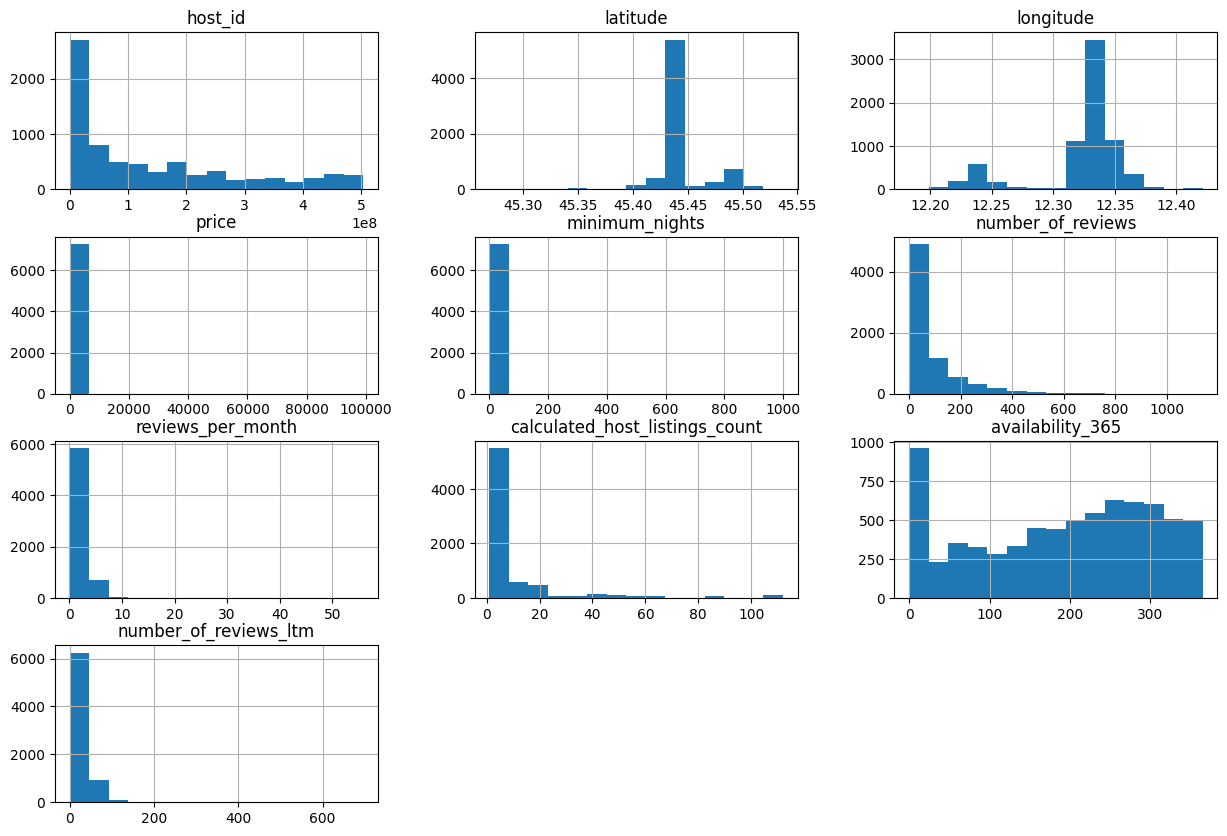

In [25]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

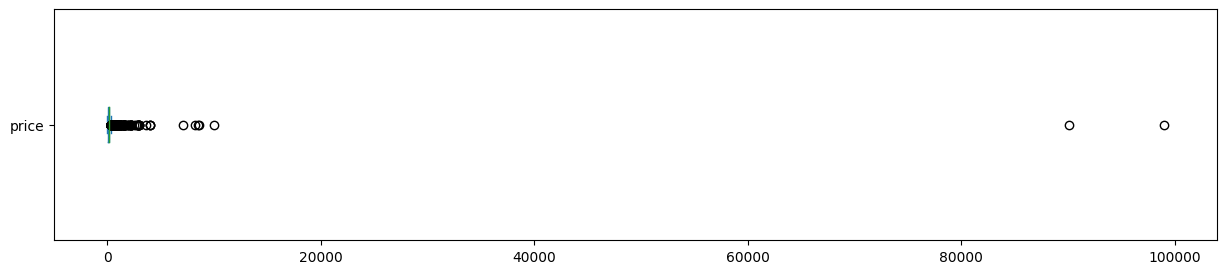

In [26]:
# ver a média da coluna `price``
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

In [27]:
print(f"A média dos preços é US$ {round(df.price.mean(), 2)} com um desvio padrão de US$ {round(df.price.std(), 2)}.")

A média dos preços é US$ 211.33 com um desvio padrão de US$ 1595.62.


Os outliers interferem a média e ofuscam os valores de interesse. Se recortarmos os dados em margens de valores, podemos ter um percepção melhor dos valores sem que precisemos remover os outliers.

In [28]:
# df.describe()
df.price.describe()

count     7286.000000
mean       211.325419
std       1595.620538
min          0.000000
25%         94.250000
50%        132.000000
75%        193.000000
max      99000.000000
Name: price, dtype: float64

In [29]:
# Constroi as valores das margens tendo como base os valores dos quartis
bins = [i for i in range(0, 4000, 500)]
bins += [4000, 15000, 100000]


# Faz o recorte
df["margens"] = pd.cut(df.price, bins=bins)


# Controi um novo dataframe para armazenar os valores do recorte
df_grouped = pd.DataFrame({})
df_grouped["ocorrencias"] = df.groupby("margens").price.count()
df_grouped["medias (US$)"] = df.groupby("margens").price.mean()
df_grouped["valores (%)"] = df_grouped["ocorrencias"] / df.price.count()


print(df_grouped)

msg = """Com o recorte, percebemos qual a ocorrência de valores para um dada margem de preços 
e ele deixa claro que 96% dos imóveis tem valor de aluguel abaixo de US$ 500,00. Para estes locais,
o valor médio é US$ 148,00. """
print(f"\n{msg}")

                 ocorrencias  medias (US$)  valores (%)
margens                                                
(0, 500]                7020    148.897009     0.963492
(500, 1000]              192    736.781250     0.026352
(1000, 1500]              27   1212.185185     0.003706
(1500, 2000]              15   1745.200000     0.002059
(2000, 2500]               7   2200.000000     0.000961
(2500, 3000]              11   2865.454545     0.001510
(3000, 3500]               0           NaN     0.000000
(3500, 4000]               4   3896.750000     0.000549
(4000, 15000]              5   8494.200000     0.000686
(15000, 100000]            2  94556.500000     0.000274

Com o recorte, percebemos qual a ocorrência de valores para um dada margem de preços 
e ele deixa claro que 96% dos imóveis tem valor de aluguel abaixo de US$ 500,00. Para estes locais,
o valor médio é US$ 148,00. 


In [30]:
# Poderíamos usar o método qcut do Pandas para recortar os dados de acordo com os percentis. Porém, os outliers ainda interferão no resultado
# print(pd.qcut(df.price, q=10).value_counts())

### **Q4. Qual a correlação existente entre as variáveis**

In [31]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.002068,-0.031791,-0.035718,0.017376,0.002345
minimum_nights,0.002068,1.000000,-0.016210,-0.025663,-0.029061,-0.000215
number_of_reviews,-0.031791,-0.016210,1.000000,0.638073,-0.158014,-0.042350
reviews_per_month,-0.035718,-0.025663,0.638073,1.000000,-0.139958,0.015774
calculated_host_listings_count,0.017376,-0.029061,-0.158014,-0.139958,1.000000,0.200809
availability_365,0.002345,-0.000215,-0.042350,0.015774,0.200809,1.000000


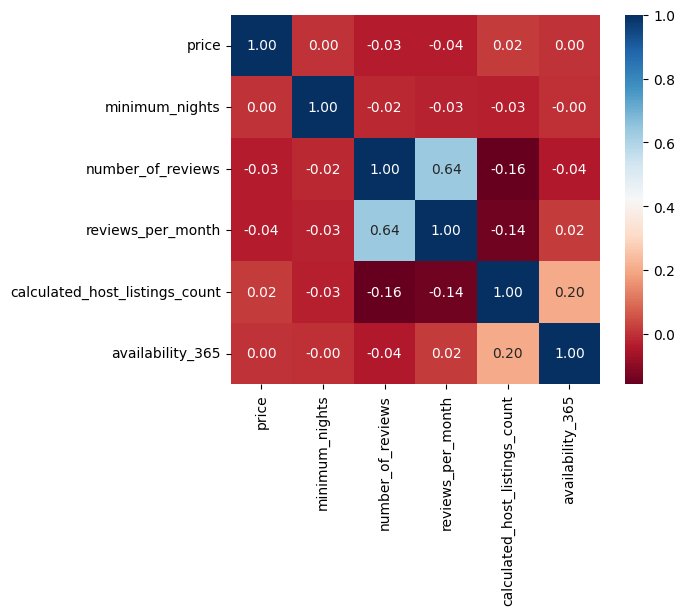

In [32]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [33]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    5672
Private room       1425
Hotel room          164
Shared room          25
Name: room_type, dtype: int64

In [34]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.778479
Private room       0.195581
Hotel room         0.022509
Shared room        0.003431
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [35]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lido                 467.515625
Castello             264.986842
Torcello             250.000000
Giudecca             249.177419
San Marco            241.974710
Marghera             227.432203
Tronchetto           226.000000
Dorsoduro            216.827458
Isola San Giorgio    200.000000
Santa Croce          199.956124
Name: price, dtype: float64

In [36]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df2['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

NameError: name 'df2' is not defined

#### Avaliação desconsiderando os _outliers_

In [ ]:
df2 = df.loc[df.price < 5000]

In [ ]:
df2.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

In [ ]:
df2.price.describe()

In [ ]:
print(f"Desconsirando os outliers, a média dos preços é US$ {round(df2.price.mean(), 2)} com um desvio padrão de US$ {round(df2.price.std(), 2)}.")

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print(f"A média do mínimo de noite são {round(df.minimum_nights.mean(), 2)} dias")

## Conclusões


Neste estudo foi avaliado os dados de hospedagem do Airbnd para a cidade de Veneza - Itália em Março de 2023.

Durante a primeira parte da avaliação, foi identificado alguns valores que destoavam dos demais. Logo, uma verificação mais minuciosa faz-se necessária e apontou alguns _outliers_. De um total de 7286 registros, 96% dos imóveis possui valor de hospedagem de até US\$ 500,00 e menos de 0.5% deles possui valor maior que US\$ 3000,00. Considerando os _outliers_, o valor médio de hospedagem é US\$ 211,3 com um desvio padrão de US$ 1595,62. Ao desconsiderarmos os _outliers_, o valor médio caiu para US\$ 179.71 com um desvio padrão de US\$ 219.77.

Portanto, uma avaliação minuciosa para identificar e remover valores destoantes contribuem para a clareza da análise e mais acertividade dos _insights_ levantados.

## Dependências

Para executar este notebook, instale as seguintes bibliotecas em seu ambiente:


```shell
pip3 install pandas==1.5.3 matplotlib==3.7.1 seaborn==0.12.2
```